# Import Libraries and Read Data

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [13]:
df.head(7)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


# Check for Missing Data

In [15]:
# check for any missing data (nulls) in the training data
has_missing = any(df.isnull().sum().tolist())
print(f"\nDoes the training data have any missing values? {has_missing}")



Does the training data have any missing values? False


# Visualize a Sample Image from the Dataset

In [16]:
# the dataset contains 784 pixel values per image (28x28 pixels)
# we select the 11th record and reshape it for display 
image = df.iloc[10][1:].to_numpy().reshape(28, 28)
image_label = df.iloc[10][0]

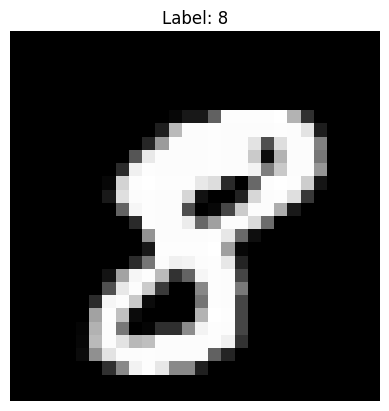

In [17]:
plt.imshow(image, cmap='gray')
plt.title(f"Label: {image_label}")
plt.axis('off')
plt.show()

# Neural Network Using TenzorFlow and Keras - Data Preparation

In [18]:
# extract Features (Pixels) and Labels
X = df.iloc[:,1:].values.astype('float32') # Convert features to float32
y = df.iloc[:,0].values.astype('int64') # Convert labels to int64

In [19]:
# split data to train-and-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split to train-and-validate 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [20]:
# check out datasets shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (26880, 784), y_train shape: (26880,)
X_val shape: (6720, 784), y_val shape: (6720,)


In [21]:
# normalize data values
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

## Build and Compile the Keras Model

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape = (784,)), # intiallize the first layer with 128 neurons
    tf.keras.layers.Dropout(0.2), # set dropout rate to avoid over-fitting
    tf.keras.layers.Dense(64, activation='relu'), # second Layer contains 64 neurons
    tf.keras.layers.Dense(10, activation='softmax') # the output layer has 10 neurons 
])

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the Model

In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7988 - loss: 0.6680 - val_accuracy: 0.9369 - val_loss: 0.2104
Epoch 2/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9410 - loss: 0.1887 - val_accuracy: 0.9552 - val_loss: 0.1437
Epoch 3/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9592 - loss: 0.1337 - val_accuracy: 0.9597 - val_loss: 0.1277
Epoch 4/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9680 - loss: 0.1041 - val_accuracy: 0.9641 - val_loss: 0.1239
Epoch 5/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0863 - val_accuracy: 0.9667 - val_loss: 0.1125
Epoch 6/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0717 - val_accuracy: 0.9690 - val_loss: 0.1076
Epoch 7/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0671 - val_accuracy: 0.9696 - val_loss: 0.1103
Epoch 8/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0605 - val_accuracy: 0.

## Evaluate and Visualize Keras Model Predictions

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc:.2f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9717 - loss: 0.1156
Test Accuracy: 0.97


## Visualize Predictions for a few Test Images

In [26]:
n_images = 10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


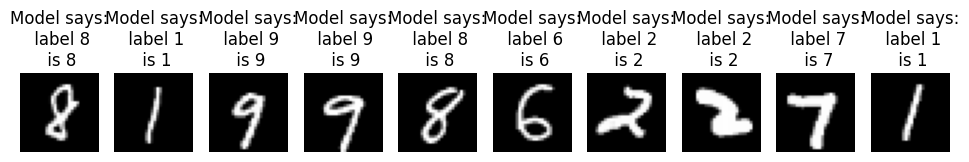

In [28]:
plt.figure(figsize= (12,6))

for i in range(n_images):
  image = X_test[i].reshape(28,28)
  label = y_test[i]
  model_prediction = model.predict(X_test[i].reshape(1,784)).argmax()

  plt.subplot(1, n_images, i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  plt.axis('off')
  plt.title(f"Model says:\n label {label}\n is {model_prediction}")

plt.show()